In [25]:
import pandas as pd

In [26]:
diabetes = pd.read_csv('dataset/pima-indians-diabetes.csv') 

In [27]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [28]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [29]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [30]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [31]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [32]:
import tensorflow as tf

In [63]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [34]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [35]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [36]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

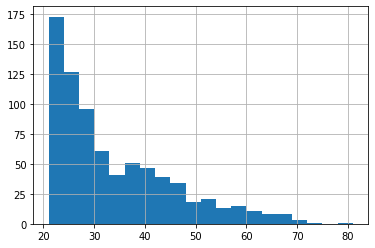

In [38]:
diabetes['Age'].hist(bins=20)

In [39]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [40]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [41]:
# TRAIN TEST DATA

In [42]:
x_data = diabetes.drop('Class',axis=1)

In [43]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [44]:
labels = diabetes['Class']

In [45]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [48]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [49]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpo7vv6chc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb360c0950>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [50]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpo7vv6chc/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 80.6095
INFO:tensorflow:loss = 9.87036, step = 101 (1.242 sec)
INFO:tensorflow:global_step/sec: 216.912
INFO:tensorflow:loss = 6.6743364, step = 201 (0.

In [51]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [52]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-15T05:04:14Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpo7vv6chc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-15-05:04:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.80172837, auc_precision_recall = 0.64440966, average_loss = 0.52561265, global_step = 1000, label/mean = 0.35064936, loss = 5.059022, precision = 0.6615385, prediction/mean = 0.3581265, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/z2

In [53]:
result

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80172837,
 'auc_precision_recall': 0.64440966,
 'average_loss': 0.52561265,
 'label/mean': 0.35064936,
 'loss': 5.059022,
 'precision': 0.6615385,
 'prediction/mean': 0.3581265,
 'recall': 0.5308642,
 'global_step': 1000}

In [54]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [55]:
predictions = model.predict(pred_input_func)

In [56]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpo7vv6chc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [57]:
my_pred

[{'logits': array([0.00579846], dtype=float32),
  'logistic': array([0.5014496], dtype=float32),
  'probabilities': array([0.4985504, 0.5014496], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.512324], dtype=float32),
  'logistic': array([0.6253511], dtype=float32),
  'probabilities': array([0.3746489 , 0.62535113], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.6081408], dtype=float32),
  'logistic': array([0.35248345], dtype=float32),
  'probabilities': array([0.64751655, 0.35248342], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.73531544], dtype=float32),
  'logistic': array([0.3240294], dtype=float32),
  'probabilities': array([0.6759706, 0.3240294], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8081813], dtype=float32),
  'logistic': array(

In [58]:
# Dense Neural Network classifier

In [61]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmp16xz38a3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a37bed790>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [64]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [66]:
embedded_group_cols = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [67]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_cols,age_bucket]

In [68]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [70]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmp0ua2y6om', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a37fa3890>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [72]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmp0ua2y6om/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmp0ua2y6om/model.ckpt.
INFO:tensorflow:loss = 4.2195497, step = 1001
INFO:tensorflow:global_step/sec: 83.5075
INFO:tensorflow:loss = 5.2555714, step = 1101 (1.199 sec)
INFO:tensorflow:global_step/sec: 210.832
INFO:tensorflow:loss = 3.5403159, step = 1201 (0.474 sec)
INFO:tensorflow:global_step/sec: 219.165
INFO:tensorflow:loss = 3.5966413, step = 1301 (0.456 sec)
INFO:tensorflow:global_step/sec: 215.906
INFO:tensorflow:loss = 6.4295177, step = 1401 (0.463 sec)
INFO:tenso

In [73]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,shuffle=False)

In [74]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-15T06:20:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmp0ua2y6om/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-15-06:20:39
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.75757575, accuracy_baseline = 0.64935064, auc = 0.83160496, auc_precision_recall = 0.7075568, average_loss = 0.48878416, global_step = 2000, label/mean = 0.35064936, loss = 4.7045474, precision = 0.6760563, prediction/mean = 0.31818256, recall = 0.5925926
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmp0ua2y6om/model.ckpt-2000


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83160496,
 'auc_precision_recall': 0.7075568,
 'average_loss': 0.48878416,
 'label/mean': 0.35064936,
 'loss': 4.7045474,
 'precision': 0.6760563,
 'prediction/mean': 0.31818256,
 'recall': 0.5925926,
 'global_step': 2000}